In [3]:
import sys
sys.path.append('..')
from fermiqp.imports import *
from fermiqp.lattice import *

from fermiqp_style import set_theme
set_theme()

## Get parameters of a perfect 1D lattice

### Lattices

0.0


Text(0, 0.5, 'Trap frequency (uK)')

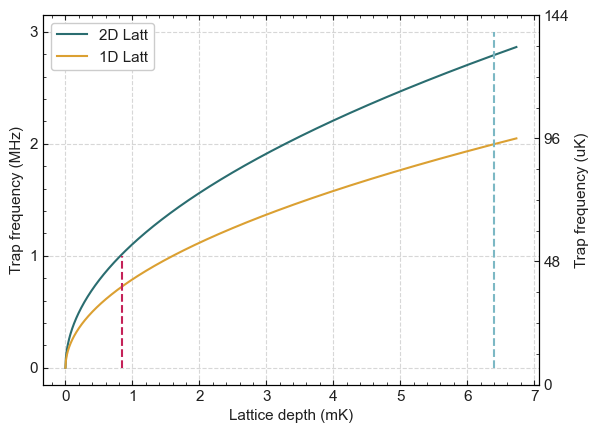

In [5]:
pinn = OpticalLattice1D(a=752e-9)
pinn1d = OpticalLattice1D(a=532e-9)

P = np.linspace(0,80,1000) # power: watts

t = 0.91
eta_boost = (t+t**3+t**5+t**7)**2
U = power2freq(power=P, waist=60e-6) * eta_boost

# U = np.linspace(0,140,1000) * 1e6

resx = lambda x: freq2temp(abs(x))*1e3
resy = lambda x: freq2temp(x)*1e3
resy = lambda x: x*1e-6
# U = 34.6e6
y = pinn.trap_freq(U)

plt.plot(resx(U), resy(y), '-',label='2D Latt')


y = pinn1d.trap_freq(U*2.25/8.79)

print(y[np.argmin(np.abs(U-temp2freq(0.85e-3)))]*1e-6)
plt.plot(resx(U), resy(y), '-',label='1D Latt')


plt.grid()

plt.legend()
plt.xlabel('Lattice depth (mK)')
plt.ylabel('Trap frequency (MHz)')

# plt.yticks()
# plt.xlim([0,6.5])

yticks = np.arange(4)
plt.yticks(yticks)
# plt.ylim([0,3])

# plt.vlines(1.6, 0, 3, color='green', ls='--')
plt.vlines(6.4, 0, 3, color='C2', ls='--')
plt.vlines(0.85, 0, 1, color='C3', ls='--')

plt.twinx()

plt.yticks(np.round(freq2temp(yticks*1e6)*1e6))
plt.ylim([0.,freq2temp(3*1e6)*1e6])
plt.ylabel('Trap frequency (uK)')

/Users/liyang/GitLab/fermiqp-physics/examples/../fermiqp/lattice.py:240: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt(hbar / mass / self.trap_freq(U=U) / 2 / pi)


Text(0, 0.5, '$a_{\\rm ho}$ (nm)')

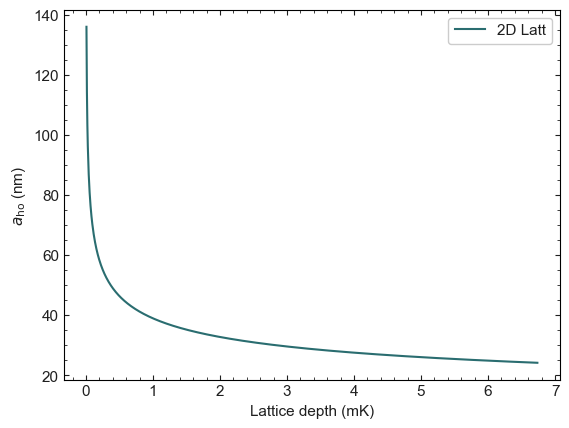

In [6]:
y = pinn.a_ho(U=U)

plt.plot(resx(U), (y)*1e9, '-',label='2D Latt')
plt.legend()
plt.xlabel('Lattice depth (mK)')
plt.ylabel(r'$a_{\rm ho}$ (nm)')


Text(0, 0.5, 'Trap frequency (ER)')

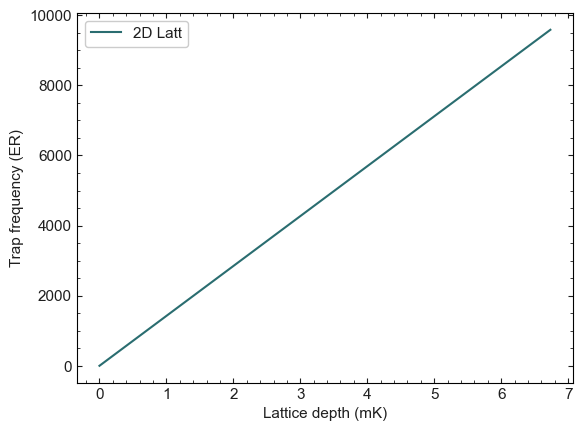

In [7]:
y = pinn.trap_freq(U=U)

plt.plot(resx(U), abs(U)/pinn.Er,'-', label='2D Latt')
plt.legend()
plt.xlabel('Lattice depth (mK)')
plt.ylabel('Trap frequency (ER)')

### Dipole trap

(0.0, 16.0)

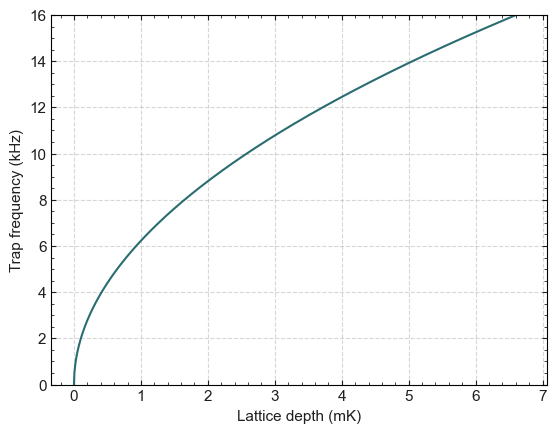

In [8]:
diptrap = DipoleTrap(waist=60e-6, U=U)
y = diptrap.trap_freq(U)

plt.plot(resx(U), resy(y)*1000)


plt.grid()
plt.xlabel('Lattice depth (mK)')
plt.ylabel('Trap frequency (kHz)')
# plt.yticks(yticks)
plt.ylim([0,16])

## Plot potentials from 3D Gaussian beams

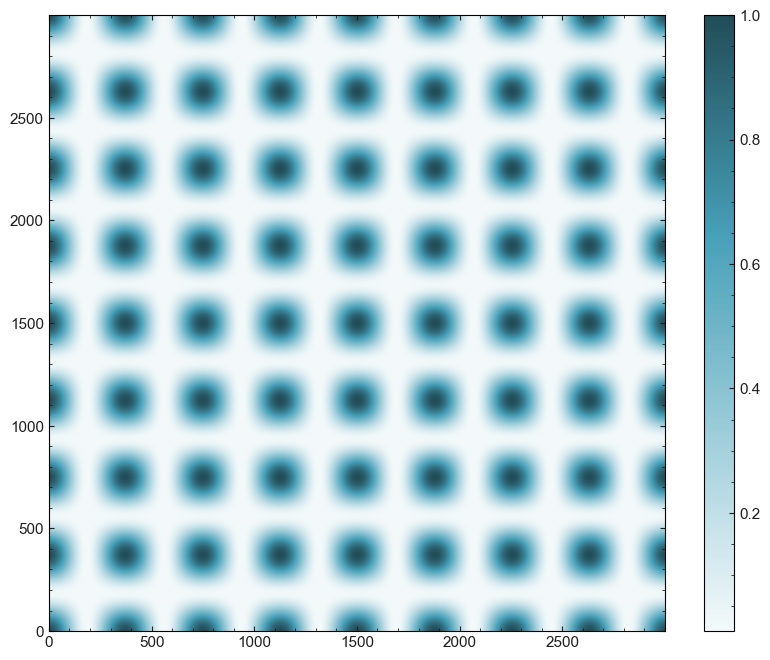

In [10]:
waist = 60e-6
theta = pi/4

t = (0.73**0.5)**0.5

z_offset = 0.

L1 = GaussianBeam3D(waist, focuspos=np.array([0,0,0]), prop_dir=np.array([np.cos(theta), np.sin(theta), 0]))
L2 = GaussianBeam3D(waist, focuspos=np.array([0,0,0]), prop_dir=np.array([-np.cos(theta), np.sin(theta), 0]))
L3 = GaussianBeam3D(waist, focuspos=np.array([0,0,-z_offset*waist]), prop_dir=np.array([np.cos(theta), -np.sin(theta), 0]))
L4 = GaussianBeam3D(waist, focuspos=np.array([0,0,z_offset*waist]), prop_dir=np.array([-np.cos(theta), -np.sin(theta), 0]))

x = np.linspace(-3,3,3000) * 1e-6
X, Y = np.meshgrid(x, x)
Z = 0.

E1 = L1.field([X, Y, Z])
E2 = L2.field([X, Y, Z])
E3 = L3.field([X, Y, Z])
E4 = L4.field([X, Y, Z])

# U = np.abs(t*E1+t**3*E2+t**5*E3+1*t**7*E4)**2
U = np.abs(t*E1+t**3*E2+t**5*E3+1*t**7*E4)**2

plt.figure(figsize=(10,8))

plt.imshow(U/U.max(), vmin=1e-2, vmax=1, cmap='density')
# plt.imshow(U/U.max(), norm=colors.LogNorm(vmin=1e-2, vmax=1), cmap='RdBu_r')
plt.colorbar()


## Normal 2D Lattice

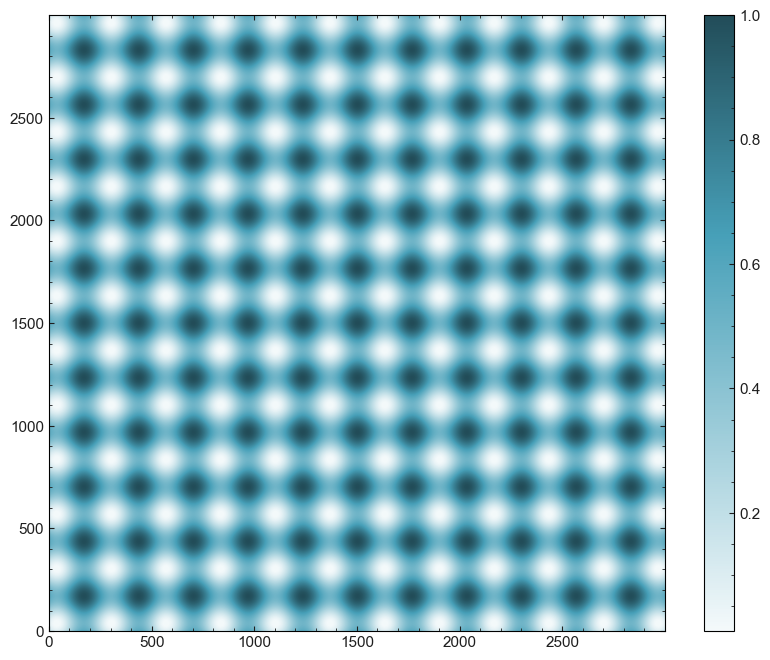

In [11]:
waist = 60e-6
theta = 0

t = (0.73**0.5)**0.5

z_offset = 0.

L1 = GaussianBeam3D(waist, focuspos=np.array([0,0,0]), prop_dir=np.array([np.cos(theta), np.sin(theta), 0]))
L2 = GaussianBeam3D(waist, focuspos=np.array([0,0,0]), prop_dir=np.array([-np.cos(theta+pi/2), np.sin(theta+pi/2), 0]))
L3 = GaussianBeam3D(waist, focuspos=np.array([0,0,-z_offset*waist]), prop_dir=np.array([np.cos(theta+pi/2), -np.sin(theta+pi/2), 0]))
L4 = GaussianBeam3D(waist, focuspos=np.array([0,0,z_offset*waist]), prop_dir=np.array([-np.cos(theta), -np.sin(theta), 0]))

x = np.linspace(-3,3,3000) * 1e-6
X, Y = np.meshgrid(x, x)
Z = 0.

E1 = L1.field([X, Y, Z])
E2 = L2.field([X, Y, Z])
E3 = L3.field([X, Y, Z])
E4 = L4.field([X, Y, Z])

# U = np.abs(t*E1+t**3*E2+t**5*E3+1*t**7*E4)**2
U = np.abs(E1+E4)**2+np.abs(E2+E3)**2

plt.figure(figsize=(10,8))

plt.imshow(U/U.max(), cmap='density', vmin=1e-2, vmax=1)
# plt.imshow(U/U.max(), cmap='RdBu_r', norm=colors.LogNorm(vmin=1e-2, vmax=1),)
plt.colorbar()